In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [2]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [3]:
prob = "CartPole"
window_size = 10
nb_episodes = 300

In [8]:
base_path = f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\New Files July 23\\MPC_methods_BatchNormTestJuly31"



### Plot subfigures



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


############################################################# 



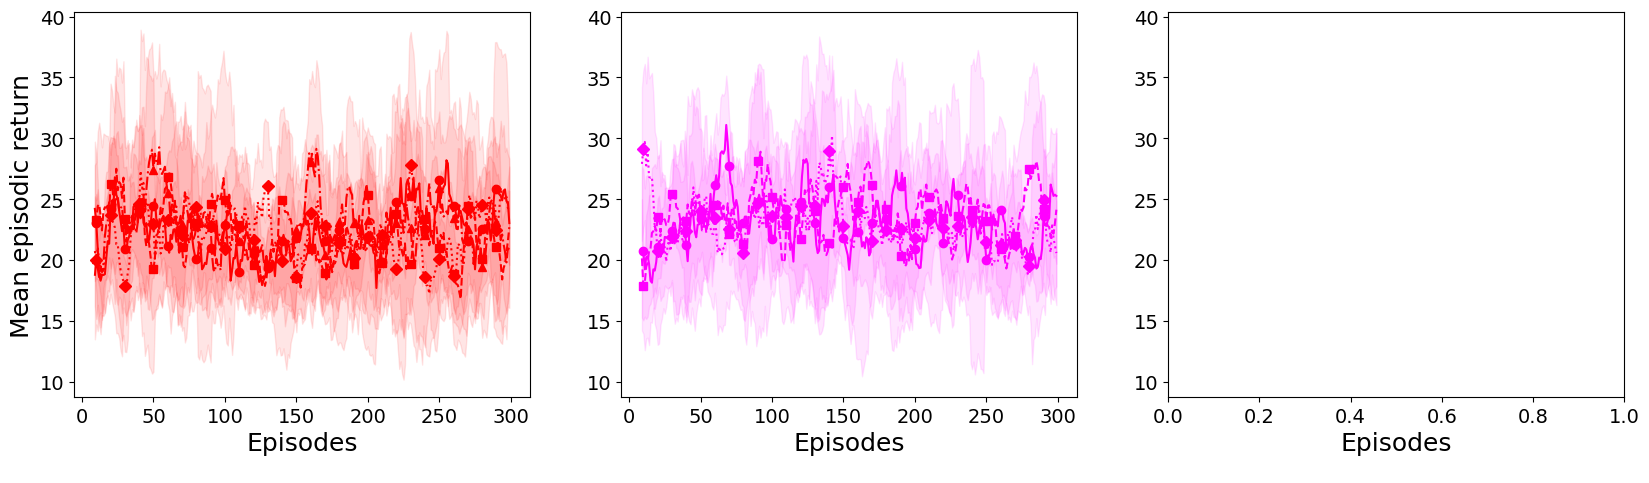

In [10]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASNN_Sampling_July31.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_Sampling_July31.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_Sampling_July31.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_Sampling_QRNN_July31.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    # auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    # print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    # CP_dict_auc_mean[label] = auc_mean
    # CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASNN_Sampling_July31_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_Sampling_July31_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_Sampling_July31_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    # auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    # print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    # CP_dict_auc_mean[label] = auc_mean
    # CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')




# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

